## DJA NIRSpec MSA Extractions v2

We have reprocessed all of the public NIRSpec datasets from the [earlier DJA](https://dawn-cph.github.io/dja/blog/2023/07/18/nirspec-data-products/) release with the latest `jwst` pipeline and calibration files and updated [msaexp v0.7](https://github.com/gbrammer/msaexp/releases/tag/0.7) release.  

Some of the major differences with respect to the previous reductions are as follows:

- Improved initial Level1 processing with snowballs identified and masked in individual exposure groups using the [snowblind](https://github.com/mpi-astronomy/snowblind) module.  The `uncal.fits` files are downloaded from MAST and processed automatically with [grizli.aws.recalibrate.do_recalibrate](https://github.com/gbrammer/grizli/blob/0d5c454afa5b28924bc4db9424db619e9b1a59ae/grizli/aws/recalibrate.py#L166).
- The 2D extraction and rectification is handled in [msaexp.slit_combine](https://github.com/gbrammer/msaexp/blob/main/msaexp/slit_combine.py).  The main algorithmic difference of the `v2` extractions is that the background is removed by taking differences of the original 2D slitlet cutouts before drizzle resampling, i.e., differences between the cross-dispersion nods. 
- Then the final spectra are combined with a 2D weighted nearest-neighbor resampling to rectify them along rows of the 2D array, but where all wavelength bins are fully independent, i.e., no correlated noise from drizzling.
- The 2D profile for the optimal extraction is also determined along the curved traces of the original spectral cutouts and rebinned/rectified in the same way as the data.  The final 1D spectrum is the optimal extraction using this profile.
- `msaexp` now has its own [path loss correction](https://github.com/gbrammer/msaexp/blob/fb582ebd4c97d128c725d9f9fafca214d7fa81db/msaexp/slit_combine.py#L89) that uses the width of the fitted profile along with the predicted intra-shutter position.  The final spectra tend to lie much closer to the scale set by the photometry than the previous versions, though for many applications you'd probably still want to scale to whatever photometry yourself.
- For programs that obtain spectra of a particular source with multiple dispersers (e.g., prism and gratings), the centering and source width of the optimal extraction profile is determined from the spectrum with the highest median S/N (usually the prism) and extractions in the other gratings are forced with those profile parameters.

## Data release

The compilation of extracted spectra and redshift measurements is provided at [nirspec_graded_v2.html](https://s3.amazonaws.com/msaexp-nirspec/extractions/nirspec_graded_v2.html).

The redshift quality grades have been copied from those of the previous release where the redshift measurements themselves agree to within tight tolerances, and extractions from any new programs since the first release were visually inspected and graded.

## Note

The `v2` spectra are affected by a bug that causes the uncertainties in the derived products to be too large by roughly a factor of $f=N^{1/4}$, where $N$ is the number of combined exposures grouped by ``source_name / detector / grating / filter / MSA plan``.  For a simple set of three exposures with the 3-Shutter-Nod dither pattern, $f=3^{1/4}\sim1.3$, i.e., the tabulated uncertainties are roughly $1.3\times$ too large.  The effect of the bug is larger for deeper programs; for typical UNCOVER extractions $f=18^{1/4}\sim2$.  For more information, see [msaexp PR#54](https://github.com/gbrammer/msaexp/pull/54).

## Observing programs

| Program                                                                          | DJA root               |    N | Grating      |
|:---------------------------------------------------------------------------------|:-----------------------|-----:|:-------------|
| [2756](https://www.stsci.edu/cgi-bin/get-proposal-info?id=2756&observatory=JWST) | abell2744-ddt-v2       |  118 | PRISM-CLEAR  |
| [1810](https://www.stsci.edu/cgi-bin/get-proposal-info?id=1810&observatory=JWST) | bluejay-north-v2       |  519 | G140M-F100LP |
|                                                                                  | bluejay-south-v2       |      | G235M-F170LP |
|                                                                                  |                        |      | G395M-F290LP |
| [1747](https://www.stsci.edu/cgi-bin/get-proposal-info?id=1747&observatory=JWST) | borg-0314m6712-v2      |  205 | PRISM-CLEAR  |
|                                                                                  | borg-0859p4114-v2      |      |              |
|                                                                                  | borg-1033p5051-v2      |      |              |
|                                                                                  | borg-1437p5044-v2      |      |              |
|                                                                                  | borg-2203p1851-v2      |      |              |
| [2750](https://www.stsci.edu/cgi-bin/get-proposal-info?id=2750&observatory=JWST) | ceers-ddt-v2           |  251 | PRISM-CLEAR  |
| [1345](https://www.stsci.edu/cgi-bin/get-proposal-info?id=1345&observatory=JWST) | ceers-v2               | 2236 | G140M-F100LP |
|                                                                                  |                        |      | G235M-F170LP |
|                                                                                  |                        |      | G395M-F290LP |
|                                                                                  |                        |      | PRISM-CLEAR  |
| [1871](https://www.stsci.edu/cgi-bin/get-proposal-info?id=1871&observatory=JWST) | gdn-chisholm-v2        |   44 | G235H-F170LP |
|                                                                                  |                        |      | G395H-F290LP |
| [2198](https://www.stsci.edu/cgi-bin/get-proposal-info?id=2198&observatory=JWST) | gds-barrufet-s156-v2   |  137 | PRISM-CLEAR  |
|                                                                                  | gds-barrufet-s67-v2    |      |              |
| [1210](https://www.stsci.edu/cgi-bin/get-proposal-info?id=1210&observatory=JWST) | gds-deep-v2            | 1219 | G140M-F070LP |
|                                                                                  |                        |      | G235M-F170LP |
|                                                                                  |                        |      | G395H-F290LP |
|                                                                                  |                        |      | G395M-F290LP |
|                                                                                  |                        |      | PRISM-CLEAR  |
| [6541](https://www.stsci.edu/cgi-bin/get-proposal-info?id=6541&observatory=JWST) | gds-egami-ddt-v2       |  345 | PRISM-CLEAR  |
| [3215](https://www.stsci.edu/cgi-bin/get-proposal-info?id=3215&observatory=JWST) | gds-udeep-v2           |  821 | G140M-F070LP |
|                                                                                  |                        |      | G395M-F290LP |
|                                                                                  |                        |      | PRISM-CLEAR  |
| [2565](https://www.stsci.edu/cgi-bin/get-proposal-info?id=2565&observatory=JWST) | glazebrook-cos-obs2-v2 |  466 | PRISM-CLEAR  |
|                                                                                  | glazebrook-cos-obs3-v2 |      |              |
|                                                                                  | glazebrook-v2          |      |              |
| [1211](https://www.stsci.edu/cgi-bin/get-proposal-info?id=1211&observatory=JWST) | goodsn-wide-v2         |  186 | PRISM-CLEAR  |
| [1181](https://www.stsci.edu/cgi-bin/get-proposal-info?id=1181&observatory=JWST) | jades-gdn2-v2          | 4176 | G140M-F070LP |
|                                                                                  | jades-gdn-v2           |      | G235M-F170LP |
|                                                                                  |                        |      | G395H-F290LP |
|                                                                                  |                        |      | G395M-F290LP |
|                                                                                  |                        |      | PRISM-CLEAR  |
| [1286](https://www.stsci.edu/cgi-bin/get-proposal-info?id=1286&observatory=JWST) | jades-gds1-v2          |  916 | G140M-F070LP |
|                                                                                  |                        |      | G235M-F170LP |
|                                                                                  |                        |      | G395H-F290LP |
|                                                                                  |                        |      | G395M-F290LP |
|                                                                                  |                        |      | PRISM-CLEAR  |
| [1180](https://www.stsci.edu/cgi-bin/get-proposal-info?id=1180&observatory=JWST) | jades-gds-wide2-v2     | 4779 | G140M-F070LP |
|                                                                                  | jades-gds-wide-v2      |      | G235M-F170LP |
|                                                                                  |                        |      | G395M-F290LP |
|                                                                                  |                        |      | PRISM-CLEAR  |
| [4246](https://www.stsci.edu/cgi-bin/get-proposal-info?id=4246&observatory=JWST) | macsj0647-hr-v2        |   44 | G395H-F290LP |
| [1433](https://www.stsci.edu/cgi-bin/get-proposal-info?id=1433&observatory=JWST) | macsj0647-v2           |  140 | PRISM-CLEAR  |
| [4557](https://www.stsci.edu/cgi-bin/get-proposal-info?id=4557&observatory=JWST) | pearls-transients-v2   |  210 | PRISM-CLEAR  |
| [4233](https://www.stsci.edu/cgi-bin/get-proposal-info?id=4233&observatory=JWST) | rubies-uds1-v2         | 1480 | G395M-F290LP |
|                                                                                  | rubies-uds2-v2         |      | PRISM-CLEAR  |
|                                                                                  | rubies-uds3-v2         |      |              |
| [2767](https://www.stsci.edu/cgi-bin/get-proposal-info?id=2767&observatory=JWST) | rxj2129-ddt-v2         |  241 | G140M-F070LP |
|                                                                                  |                        |      | G140M-F100LP |
|                                                                                  |                        |      | PRISM-CLEAR  |
| [2736](https://www.stsci.edu/cgi-bin/get-proposal-info?id=2736&observatory=JWST) | smacs0723-ero-v2       |  102 | G235M-F170LP |
|                                                                                  |                        |      | G395M-F290LP |
| [4446](https://www.stsci.edu/cgi-bin/get-proposal-info?id=4446&observatory=JWST) | snh0pe-v2              |  116 | G140M-F100LP |
|                                                                                  |                        |      | G235M-F170LP |
|                                                                                  |                        |      | PRISM-CLEAR  |
| [2110](https://www.stsci.edu/cgi-bin/get-proposal-info?id=2110&observatory=JWST) | suspense-kriek-v2      |   45 | G140M-F100LP |
| [2561](https://www.stsci.edu/cgi-bin/get-proposal-info?id=2561&observatory=JWST) | uncover-v2             |  766 | PRISM-CLEAR  |

In [1]:
import os
if os.path.exists('gbrammer' in os.environ['HOME']) & False:
    
    # Extract summary from database
    from grizli.aws import db
    import pyperclip

    # db queries require DB credentials
    nre = db.SQL("""select SUBSTR(MIN(dataset), 4, 4) as pid,
                           array_agg(DISTINCT(root)) as root,
                           count(*) as N,
                           array_agg(DISTINCT(grating || '-' || filter)) as Grating
    FROM nirspec_extractions WHERE ROOT LIKE '%%v2' AND dataset not like 'jw01208%%'
    GROUP BY SUBSTR(dataset, 4, 4)
    ORDER BY MAX(root)""")
    
    nre['root'] = ['\n'.join(r) for r in nre['root']]
    nre['grating'] = ['\n'.join(r) for r in nre['grating']]
    nre.rename_column('root','DJA root')
    url = '[{pid}](https://www.stsci.edu/cgi-bin/get-proposal-info?id={pid}&observatory=JWST)'
    prog = [url.format(**row) for row in nre]
    nre['Program'] = prog
    
    pyperclip.copy('## Observing programs\n\n' +
                   nre['Program','DJA root','n','grating'].to_pandas(index=False).to_markdown(index=False))

In [2]:
%matplotlib inline

import os
import yaml

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import astropy.io.fits as pyfits

import grizli
import grizli.catalog
from grizli import utils

import eazy
import msaexp
import msaexp.spectrum

print(f'grizli version: {grizli.__version__}')
print(f'eazy-py version: {eazy.__version__}')
print(f'msaexp version: {msaexp.__version__}')

grizli version: 1.11.3.dev2+gd57387c.d20240222
eazy-py version: 0.6.8.dev1+g3fb0ad2.d20240129
msaexp version: 0.7.3.dev0+g3e012ec.d20240222


## Compare `v1` and `v2`

- The `v2` extractions are generally cleaner with fewer non-Gaussian outliers
- The normalization of the `v2` extractions is generally both "brighter" and "redder" as a result of the internal wavelength-dependent path loss correction

https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-ddt-v1/ceers-ddt-v1_prism-clear_2750_1598.spec.fits
https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-ddt-v2/ceers-ddt-v2_prism-clear_2750_1598.spec.fits


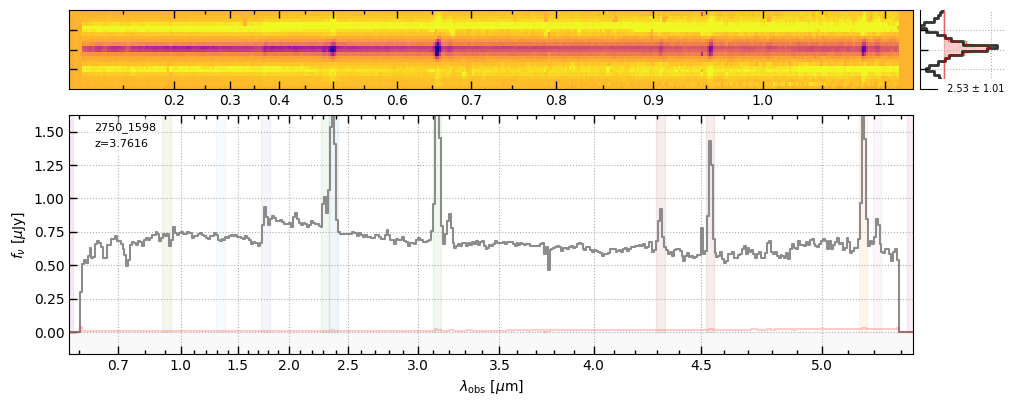

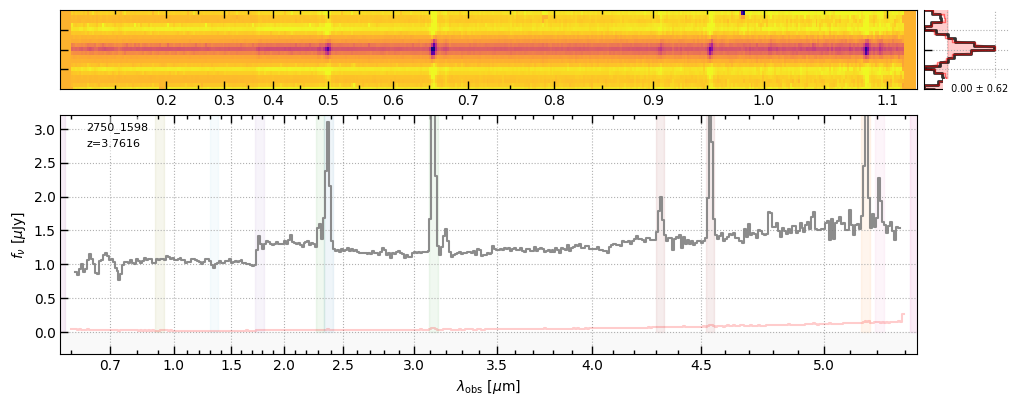

In [3]:
z, v2_file = 3.7616, 'https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-ddt-v2/ceers-ddt-v2_prism-clear_2750_1598.spec.fits'

v1_file = v2_file.replace('ceers-v2','ceers-lr-v1').replace('-v2','-v1')
print(v1_file + '\n' + v2_file)

sp1 = msaexp.spectrum.SpectrumSampler(v1_file)
sp2 = msaexp.spectrum.SpectrumSampler(v2_file)

f1 = sp1.drizzled_hdu_figure(z=z, unit='fnu')
f2 = sp2.drizzled_hdu_figure(z=z, unit='fnu')

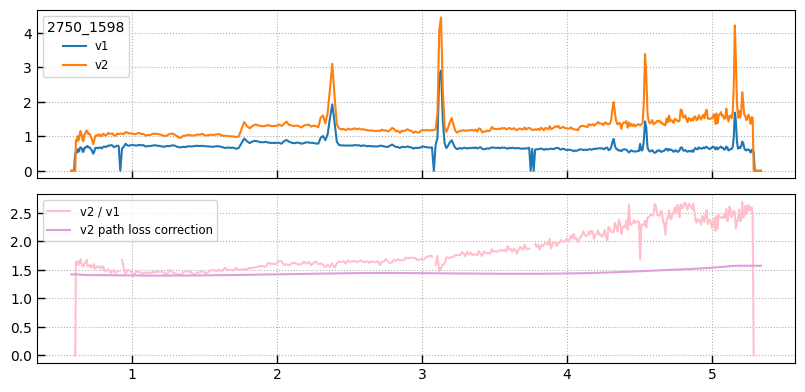

In [4]:
import msaexp.slit_combine
from msaexp.slit_combine import slit_prf_fraction

fig, axes = plt.subplots(2,1,figsize=(8,4), sharex=True)

ax = axes[0]
ax.plot(sp1['wave'], sp1['flux'], label='v1')
ax.plot(sp2['wave'], sp2['flux'], label='v2')
leg = ax.legend(loc='upper left')
leg.set_title(sp2.meta['SRCNAME'])
ax.grid()

# Ratios
axes[1].plot(sp2['wave'], sp2['flux'] / sp1['flux'], label=r'v2 / v1', color='pink')

path_corr = slit_prf_fraction(sp2.spec['wave'].astype(float),
                              sigma=sp2.spec.meta['SIGMA'],
                              x_pos=sp2.spec.meta['SRCXPOS'],
                              slit_width=0.2,
                              pixel_scale=msaexp.slit_combine.PIX_SCALE,
                              verbose=False)

axes[1].plot(sp2.spec['wave'], 1./path_corr, color='plum', label='v2 path loss correction')
axes[1].grid()
axes[1].legend(loc='upper left')

fig.tight_layout(pad=1)

## Compare gratings

All `v2` extractions now have the same `root`, rather than being split in some cases.

https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-v2/ceers-v2_prism-clear_1345_3506.spec.fits
https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-v2/ceers-v2_g140m-f100lp_1345_3506.spec.fits
https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-v2/ceers-v2_g235m-f170lp_1345_3506.spec.fits
https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-v2/ceers-v2_g395m-f290lp_1345_3506.spec.fits


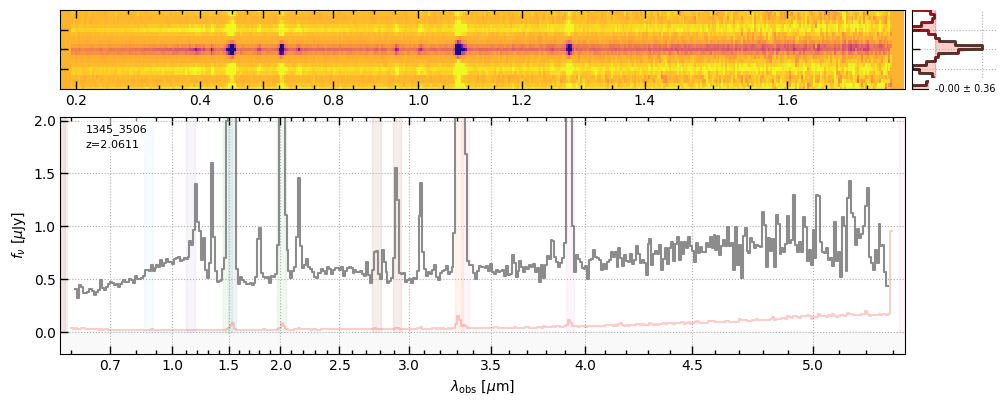

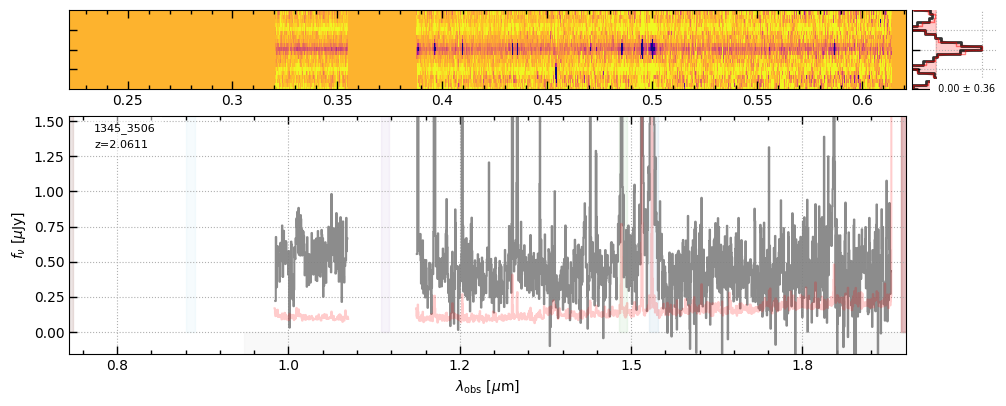

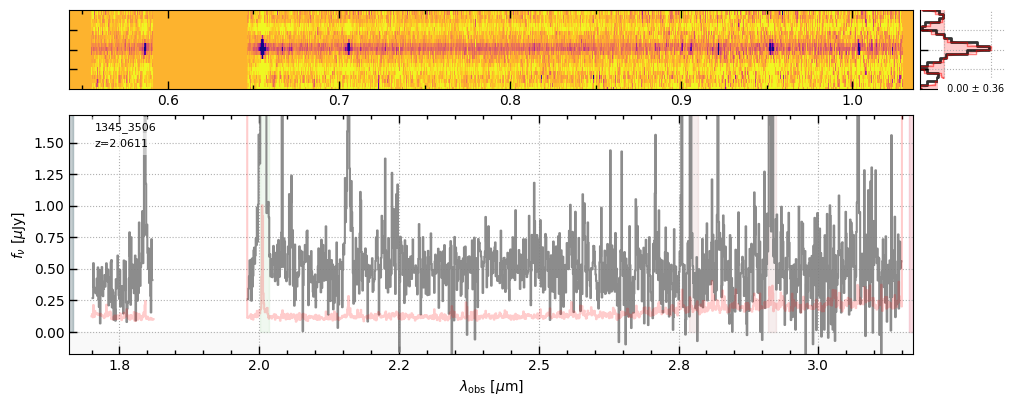

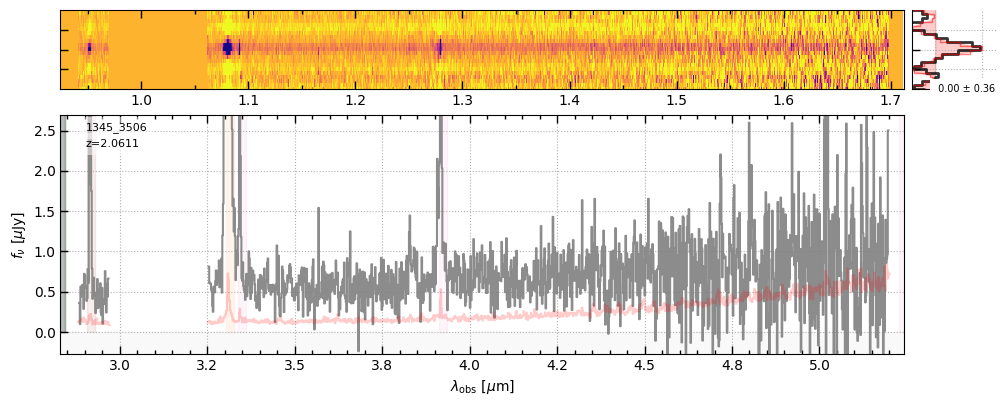

In [5]:
z, prism_file = 2.0611, 'https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-v2/ceers-v2_prism-clear_1345_3506.spec.fits'

sp = {}
for grating in ['prism-clear','g140m-f100lp','g235m-f170lp','g395m-f290lp']:
    file = prism_file.replace('prism-clear',grating)
    print(file)
    sp[grating] = msaexp.spectrum.SpectrumSampler(file)

    fig = sp[grating].drizzled_hdu_figure(z=z, unit='fnu')

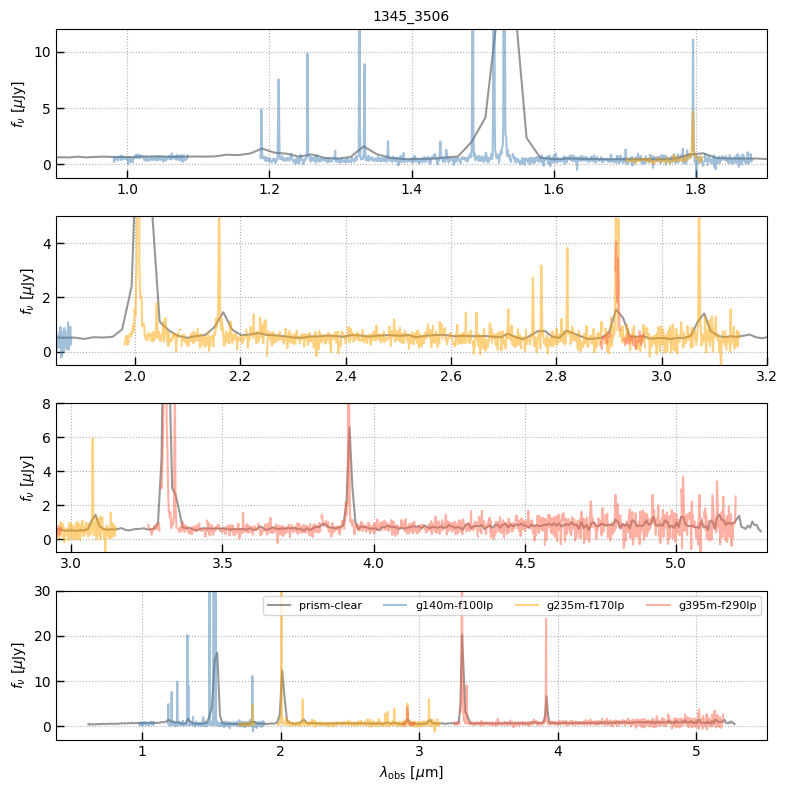

In [6]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

colors = ['0.2','steelblue','orange','tomato']

for i, grating in enumerate(sp):
    sp[grating]['flux'][~sp[grating].valid] = np.nan
    for ax in axes:
        ax.plot(sp[grating]['wave'], sp[grating]['flux'], alpha=0.5, label=grating, color=colors[i])

leg = axes[3].legend(ncol=4, fontsize=8)
axes[0].set_title(sp[grating].meta['SRCNAME'])

axes[0].set_xlim(0.9, 1.9); axes[0].set_ylim(-1.2, 12)
axes[1].set_xlim(1.85, 3.2); axes[1].set_ylim(-0.5, 5)
axes[2].set_xlim(2.95, 5.3); axes[2].set_ylim(-0.8, 8)
axes[3].set_ylim(-3,30)
axes[3].set_xlabel(r'$\lambda_\mathrm{obs}~[\mu\mathrm{m}]$')

for ax in axes:
    ax.grid()
    ax.set_ylabel(r'$f_\nu~[\mu\mathrm{Jy}]$')

fig.tight_layout(pad=1)